##Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google import colab as cl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
import torch.nn as nn

## Base de dados

In [ ]:
np.random.seed(123) #semente geradora aleatória, gera os mesmos valores para reproducibilidade

In [ ]:
torch.manual_seed(123)

In [ ]:
file_upload = cl.files.upload() #importando arquivo para computador

Saving saidas_breast.csv to saidas_breast.csv
Saving entradas_breast.csv to entradas_breast.csv


In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.shape

(569, 1)

In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
np.unique(classe)

array([0, 1])

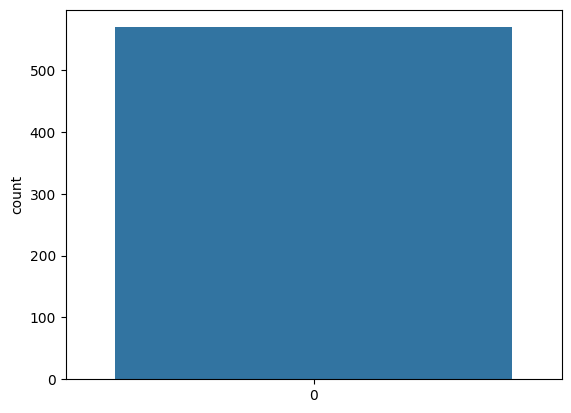

In [ ]:
sns.countplot(classe['0']);

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                             classe,
                                                                                             test_size=0.25)

In [ ]:
previsores_treinamento.shape

(426, 30)

In [ ]:
classe_treinamento.shape

(426, 1)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_teste.shape

(143, 1)

#Transformação dos dados para tensores com pytorch

In [ ]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [ ]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [ ]:
#transformando para tensores do pytorch
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [ ]:
type(previsores_treinamento)

torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True) #Classe responsável por fornecer o número certo de dados de acordo com o tamanho do batch

## Construção do Modelo

In [ ]:
# 30 ->                                 (camada de entrada de acordo com a quantidade de atributos do dataset)
# 30 -> 16 -> 16 -> 1                   (estrutura do nosso modelo)
# (entradas + saida)/2 -> (30 + 1)/2 = 16

classificador = nn.Sequential(

    nn.Linear(in_features=30, out_features=16),                          #Linear - camada densa
    nn.ReLU(),                                                           #Função de ativação

    nn.Linear(16, 16),
    nn.ReLU(),

    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Treinamento do Modelo

In [ ]:
# fit -> keras

for epoch in range(100):
  runnin_loss = 0. #float
  for data in train_loader:

    inputs, labels = data

    optimizer.zero_grad() #zerando optimizador

    outputs = classificador(inputs)

    loss = criterion(outputs, labels) #cálculo do erro

    loss.backward() #backpropagation

    optimizer.step() #atualizando pesos

    runnin_loss += loss.item() # somando loss

  print('Epoch %3d: Loss %.5f' % (epoch + 1, runnin_loss/len(train_loader)))



Epoch   1: Loss 1.51518
Epoch   2: Loss 1.37313
Epoch   3: Loss 1.17753
Epoch   4: Loss 0.46702
Epoch   5: Loss 0.45345
Epoch   6: Loss 0.42015
Epoch   7: Loss 0.41441
Epoch   8: Loss 0.41818
Epoch   9: Loss 0.41451
Epoch  10: Loss 0.40360
Epoch  11: Loss 0.40899
Epoch  12: Loss 0.42292
Epoch  13: Loss 0.40394
Epoch  14: Loss 0.39880
Epoch  15: Loss 0.41182
Epoch  16: Loss 0.40407
Epoch  17: Loss 0.40796
Epoch  18: Loss 0.39543
Epoch  19: Loss 0.44293
Epoch  20: Loss 0.38772
Epoch  21: Loss 0.39084
Epoch  22: Loss 0.39196
Epoch  23: Loss 0.41380
Epoch  24: Loss 0.38919
Epoch  25: Loss 0.37615
Epoch  26: Loss 0.46295
Epoch  27: Loss 0.40813
Epoch  28: Loss 0.38460
Epoch  29: Loss 0.38737
Epoch  30: Loss 0.40433
Epoch  31: Loss 0.39000
Epoch  32: Loss 0.39384
Epoch  33: Loss 0.45112
Epoch  34: Loss 0.47273
Epoch  35: Loss 0.39728
Epoch  36: Loss 0.37407
Epoch  37: Loss 0.38767
Epoch  38: Loss 0.38713
Epoch  39: Loss 0.37857
Epoch  40: Loss 0.36122
Epoch  41: Loss 0.39375
Epoch  42: Loss 

## Visualização dos Pesos

In [ ]:
# 30 -> 16 -> 16 -> 1

params = list(classificador.parameters())

In [ ]:
params

[Parameter containing:
 tensor([[-6.5726e-02, -1.3250e-01, -1.1543e-01,  9.7306e-02, -5.5827e-02,
           7.2349e-02, -7.0779e-02, -5.1201e-02, -2.6780e-01,  7.0585e-02,
           5.1058e-02,  2.6027e-02, -1.7242e-01, -2.6746e-02,  5.9645e-04,
          -1.7268e-01, -2.7165e-01, -7.2375e-02, -1.7675e-01,  1.4501e-04,
           1.3932e-01, -1.3133e-01,  1.4250e-02,  1.8267e-01, -1.3170e-01,
           1.2603e-01, -1.5439e-01,  1.8953e-01,  3.1906e-01, -1.3036e-01],
         [ 1.9333e-01,  1.9529e-01,  3.0178e-01,  8.3539e-02, -1.6293e-01,
          -1.0139e-01, -1.0604e-01, -1.8043e-01, -4.8438e-02,  1.3989e-01,
           1.0773e-02, -7.5763e-02, -9.1847e-03,  2.0485e-01, -1.7090e-02,
          -1.1943e-01, -5.5953e-02,  2.7627e-01,  1.2012e-01, -1.8767e-02,
           9.2927e-02,  4.8225e-02,  2.1042e-01,  7.3262e-03,  8.6809e-02,
          -2.2976e-01, -3.2276e-01, -5.0865e-02, -6.9487e-02, -1.4413e-01],
         [-1.1060e-02,  3.1774e-02, -1.2993e-01, -1.0962e-01,  6.1701e-39,


In [ ]:
pesos0 = params[0] # primeira camada oculta
pesos0.shape

torch.Size([16, 30])

In [ ]:
print(pesos0)

Parameter containing:
tensor([[-6.5726e-02, -1.3250e-01, -1.1543e-01,  9.7306e-02, -5.5827e-02,
          7.2349e-02, -7.0779e-02, -5.1201e-02, -2.6780e-01,  7.0585e-02,
          5.1058e-02,  2.6027e-02, -1.7242e-01, -2.6746e-02,  5.9645e-04,
         -1.7268e-01, -2.7165e-01, -7.2375e-02, -1.7675e-01,  1.4501e-04,
          1.3932e-01, -1.3133e-01,  1.4250e-02,  1.8267e-01, -1.3170e-01,
          1.2603e-01, -1.5439e-01,  1.8953e-01,  3.1906e-01, -1.3036e-01],
        [ 1.9333e-01,  1.9529e-01,  3.0178e-01,  8.3539e-02, -1.6293e-01,
         -1.0139e-01, -1.0604e-01, -1.8043e-01, -4.8438e-02,  1.3989e-01,
          1.0773e-02, -7.5763e-02, -9.1847e-03,  2.0485e-01, -1.7090e-02,
         -1.1943e-01, -5.5953e-02,  2.7627e-01,  1.2012e-01, -1.8767e-02,
          9.2927e-02,  4.8225e-02,  2.1042e-01,  7.3262e-03,  8.6809e-02,
         -2.2976e-01, -3.2276e-01, -5.0865e-02, -6.9487e-02, -1.4413e-01],
        [-1.1060e-02,  3.1774e-02, -1.2993e-01, -1.0962e-01,  6.1701e-39,
          5.36

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Avaliação do modelo

In [ ]:
classificador.eval() # modo de avaliação

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste) #passa nos registros na rede neural

In [ ]:
previsoes

tensor([[9.9015e-01],
        [1.0000e+00],
        [9.8388e-02],
        [9.5560e-01],
        [2.7106e-05],
        [8.1492e-01],
        [9.8330e-01],
        [9.9999e-01],
        [8.6186e-01],
        [2.7503e-01],
        [9.2974e-01],
        [9.9850e-01],
        [7.5576e-01],
        [9.9318e-01],
        [9.2663e-01],
        [8.4756e-01],
        [9.9375e-01],
        [1.0000e+00],
        [4.7329e-01],
        [9.9946e-01],
        [3.4904e-13],
        [2.1142e-03],
        [6.4750e-01],
        [1.0000e+00],
        [8.4581e-01],
        [6.4335e-04],
        [2.9777e-01],
        [9.9999e-01],
        [1.2475e-06],
        [9.9776e-01],
        [2.7111e-01],
        [9.9999e-01],
        [9.4465e-01],
        [9.7372e-01],
        [1.6834e-01],
        [9.9844e-01],
        [1.7211e-01],
        [9.9944e-01],
        [9.9456e-01],
        [8.6755e-07],
        [1.5663e-04],
        [9.1585e-01],
        [2.0162e-08],
        [2.5825e-01],
        [6.2254e-07],
        [6

In [ ]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8881118881118881

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[45,  9],
       [ 7, 82]])

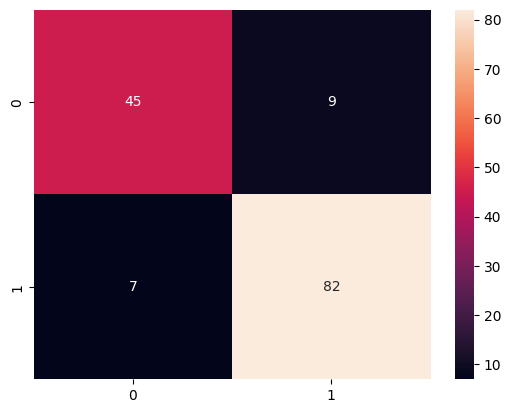

In [ ]:
sns.heatmap(matriz, annot=True);